In [1]:
# Import standard packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns

# extraindo data set e printando os 5 primeiros e 5 ultimos dados junto com as dimensoes
matches_info_df = pd.read_csv("https://raw.githubusercontent.com/gabrielaragao01/Data-Science-Project/main/code/first-steps/matches_info_df.csv", index_col=0)
matches_info_df

,result,performance_rank_home,home_team_name,B365H,B365D,B365A,away_team_name,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),...,home_season_shots,home_season_shots_on_target,referee,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_fouls,away_team_fouls,dirty
0,1,6,Manchester United,1.57,3.90,7.50,Leicester City,9,0.00,0.00,...,235,145,Andre Marriner,2,0,1,0,11,8,0
1,-1,13,Newcastle United,3.90,3.50,2.04,Tottenham Hotspur,4,0.00,0.00,...,213,98,Martin Atkinson,2,0,2,0,11,12,0
2,2,14,AFC Bournemouth,1.90,3.60,4.50,Cardiff City,18,0.00,0.00,...,191,100,Kevin Friend,1,0,1,0,11,9,1
3,-2,19,Fulham,2.50,3.40,3.00,Crystal Palace,12,0.00,0.00,...,223,101,Mike Dean,1,0,2,0,9,11,1
4,-3,20,Huddersfield Town,6.50,4.00,1.61,Chelsea,3,0.00,0.00,...,169,77,Chris Kavanagh,2,0,1,0,9,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2,2,Liverpool,1.30,6.00,11.00,Wolverhampton Wanderers,7,2.78,1.28,...,267,145,Martin Atkinson,0,0,2,0,3,11,0
376,-2,6,Manchester United,1.28,6.50,11.00,Cardiff City,18,2.00,0.61,...,235,145,Jonathan Moss,3,0,3,0,9,6,0
377,0,16,Southampton,1.44,4.75,8.50,Huddersfield Town,20,1.22,0.33,...,207,108,Lee Probert,0,0,1,0,8,6,0
378,0,4,Tottenham Hotspur,2.20,3.50,3.50,Everton,8,2.06,1.06,...,236,124,Andre Marriner,0,0,2,0,10,13,0


In [2]:
matches_info_df.describe()

,result,performance_rank_home,B365H,B365D,B365A,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,away_team_goal_count,...,away_team_corner_count,home_season_shots,home_season_shots_on_target,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_fouls,away_team_fouls,dirty
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,0.315789,10.500000,3.289184,4.583447,5.633763,10.500000,1.480895,1.167632,1.568421,1.252632,...,4.557895,215.300000,109.450000,1.544737,0.047368,1.715789,0.076316,10.160526,10.281579,0.300000
std,1.915156,5.773884,3.264296,1.944515,5.920971,5.773884,0.831446,0.761209,1.312836,1.180031,...,2.731487,33.315625,23.797854,1.228766,0.212706,1.208267,0.275599,3.287944,3.490232,0.458862
min,-5.000000,1.000000,1.060000,3.000000,1.120000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,169.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,-1.000000,5.750000,1.570000,3.500000,2.300000,5.750000,1.000000,0.630000,1.000000,0.000000,...,2.750000,190.500000,97.000000,1.000000,0.000000,1.000000,0.000000,8.000000,8.000000,0.000000
50%,0.000000,10.500000,2.300000,3.800000,3.400000,10.500000,1.470000,1.075000,1.000000,1.000000,...,4.000000,213.000000,104.500000,1.000000,0.000000,2.000000,0.000000,10.000000,10.000000,0.000000
75%,2.000000,15.250000,3.250000,5.000000,6.500000,15.250000,2.062500,1.610000,2.000000,2.000000,...,6.000000,235.250000,119.500000,2.000000,0.000000,2.000000,0.000000,12.000000,12.250000,1.000000
max,6.000000,20.000000,23.000000,17.000000,41.000000,20.000000,3.000000,3.000000,6.000000,6.000000,...,14.000000,307.000000,167.000000,6.000000,1.000000,5.000000,2.000000,23.000000,21.000000,1.000000


In [3]:
# Identificação das colunas com valores nulos e contagem dos valores nulos
null_counts = matches_info_df.isnull().sum()

# Filtragem das colunas que possuem valores nulos
null_counts = null_counts[null_counts > 0]

# Print das colunas com valores nulos e suas respectivas contagens
print(null_counts)

home_team_goal_timings              88
away_team_goal_timings             119
home_team_shots_on_target_dirty    114
dtype: int64


### verifying if there is some real NANs home_team_timings or those games just doesnt had a goal

In [4]:
def verifying_nans(column_to_verify, auxiliar_column):
   # Identify rows where 'home_team_goal_timings' is null
    goal_timings_null = matches_info_df[column_to_verify].isnull()

    # Save the indices of the rows where 'home_team_goal_timings' is null
    null_rows = matches_info_df[goal_timings_null].index

    # Check if the column 'home_team_goal_count' is 0 in the rows with null indices
    any_incorrect = (matches_info_df.loc[null_rows, auxiliar_column] != 0).any()

    # Print the result
    print(f'Does exist {column_to_verify} left? {any_incorrect}')

verifying_nans('home_team_goal_timings', 'home_team_goal_count')
verifying_nans('away_team_goal_timings', 'away_team_goal_count')

Does exist home_team_goal_timings left? False
Does exist away_team_goal_timings left? False


### So, as we could see, those NANs are just cause this team doesnt make a goal this match

### Lets check the column home_team_shots_on_target_dirty

In [5]:
def verifying_target_shots_nans(column_to_verify, auxiliary_column):
    # Calculate the sum of the 'column_to_verify'
    target_shots_count = matches_info_df[column_to_verify].sum()

    # Calculate the total count expected for the 'auxiliary_column'
    # Assuming a team plays 19 times at home and there are 20 teams 
    # (19x20= 380 the size of data frame), the total count is divided by 19
    # so we divided by 19 cause we want the total shots on target of each team
    target_shots_total_count = matches_info_df[auxiliary_column].sum() / 19

    # Print the result
    if target_shots_count == target_shots_total_count:
        print(f'The column {column_to_verify} has data missing? False')
    else:
        print(f'The column {column_to_verify} has data missing? True')

# Verify missing data for 'home_team_shots_on_target_dirty' column using 'home_season_shots_on_target' as the auxiliary column
verifying_target_shots_nans('home_team_shots_on_target_dirty', 'home_season_shots_on_target')

# Verify missing data for 'home_team_shots_on_target_original' column using 'home_season_shots_on_target' as the auxiliary column
verifying_target_shots_nans('home_team_shots_on_target_original', 'home_season_shots_on_target')

The column home_team_shots_on_target_dirty has data missing? True
The column home_team_shots_on_target_original has data missing? False


In [6]:
print(matches_info_df.home_team_shots.describe())
matches_info_df.home_team_shots_on_target_dirty.describe()

count    380.000000
mean      11.331579
std        4.278011
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       26.000000
Name: home_team_shots, dtype: float64


count    266.000000
mean       5.744361
std        2.701933
min        0.000000
25%        4.000000
50%        5.500000
75%        7.000000
max       15.000000
Name: home_team_shots_on_target_dirty, dtype: float64

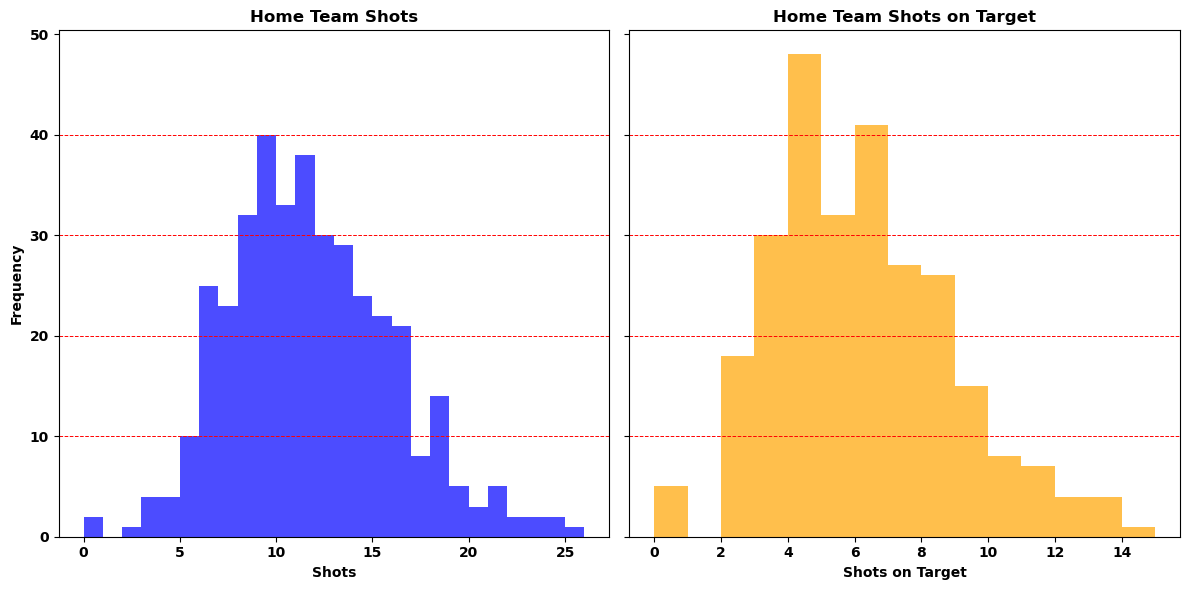

In [7]:
# Extração dos dados relevantes
general_shots = matches_info_df['home_team_shots']
shots_on_target = matches_info_df['home_team_shots_on_target_dirty']

# Criação dos plots
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))

# Plot do histograma de general_shots
ax1.hist(general_shots, bins=int(general_shots.max()), color='blue', alpha=0.7)
ax1.set_title('Home Team Shots')
ax1.set_xlabel('Shots')
ax1.set_ylabel('Frequency')

# Adição das linhas tracejadas verdes
for y in [40, 30, 20, 10]:
    ax1.axhline(y=y, color='red', linestyle='--', linewidth=0.7)
    ax2.axhline(y=y, color='red', linestyle='--', linewidth=0.7)

# Plot do histograma de shots_on_target
ax2.hist(shots_on_target, bins=int(shots_on_target.max()), color='orange', alpha=0.7)
ax2.set_title('Home Team Shots on Target')
ax2.set_xlabel('Shots on Target')

# Ajuste do layout
plt.tight_layout()
plt.show()

In [8]:
teams_stats.dtypes

NameError: name 'teams_stats' is not defined

In [ ]:
teams_stats.describe()

,wins,wins_home,wins_away,draws,draws_home,draws_away,losses,losses_home,losses_away,points_per_game,...,goals_scored_home,goals_scored_away,goals_conceded_home,goals_conceded_away,clean_sheets,clean_sheets_home,clean_sheets_away,corners_total_home,corners_total_away,cards_total
count,20.000000,20.000000,20.000000,20.00000,20.00000,20.00000,20.000000,20.000000,20.00000,20.00000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,15.450000,9.050000,6.400000,7.10000,3.55000,3.55000,15.450000,6.400000,9.05000,1.40600,...,29.800000,23.800000,23.800000,29.800000,10.350000,5.950000,4.400000,108.800000,86.60000,65.750000
std,7.250953,4.019361,3.560012,2.44734,1.90498,1.79106,6.778255,3.761299,3.54631,0.55311,...,11.542142,7.831112,7.878017,9.225822,4.522168,2.605157,2.458069,18.074699,19.69344,11.391941
min,3.000000,2.000000,1.000000,2.00000,0.00000,0.00000,1.000000,0.000000,1.00000,0.42000,...,10.000000,12.000000,10.000000,11.000000,5.000000,2.000000,1.000000,80.000000,59.00000,41.000000
25%,10.750000,6.000000,4.000000,6.75000,2.00000,2.00000,12.250000,4.500000,7.75000,1.04500,...,23.500000,18.000000,19.000000,25.000000,7.000000,4.000000,2.750000,95.750000,74.50000,61.750000
50%,14.500000,8.000000,6.000000,7.00000,3.00000,4.00000,16.000000,6.000000,8.00000,1.34500,...,27.500000,24.000000,25.000000,29.500000,9.500000,5.500000,4.000000,108.000000,85.00000,65.000000
75%,19.500000,10.500000,9.000000,9.00000,5.00000,5.00000,19.250000,9.250000,11.25000,1.76500,...,33.250000,31.250000,28.500000,35.000000,12.250000,7.000000,5.250000,119.250000,95.00000,74.500000
max,32.000000,18.000000,14.000000,12.00000,8.00000,8.00000,28.000000,14.000000,16.00000,2.58000,...,57.000000,38.000000,38.000000,45.000000,21.000000,12.000000,11.000000,154.000000,144.00000,85.000000


<Axes: >

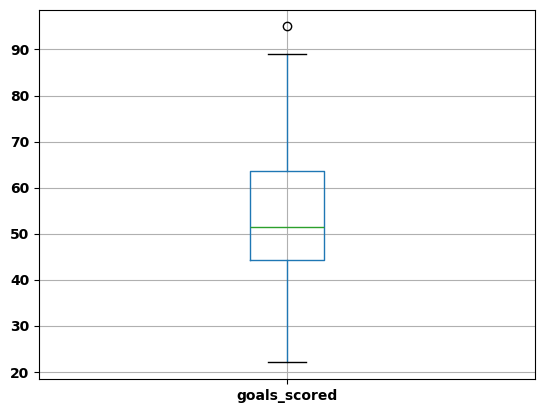

In [ ]:
teams_stats.boxplot(column='goals_scored')